In [2]:
from graphviz import Digraph
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

# Zadatak 1

## 1) Graf koji predstavlja dati problem

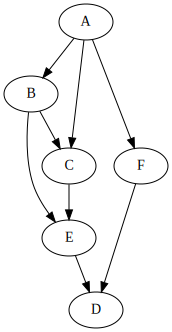

In [18]:
dot = Digraph(comment="Bayesian Network graph")

dot.node("A", "A")
dot.node("B", "B")
dot.node("F", "F")
dot.node("C", "C")
dot.node("E", "E")
dot.node("D", "D")

dot.edges(["AB", "AF", "AC", "BE", "BC", "FD", "CE", "ED",])

dot

## 2) Procena $P(b^+ |d^+ , f^+)$

In [14]:
pa = 0.4

tuv_b = {0: 0.7, 1: 0.2}

tuv_f= {0: 0.4, 1: 0.6}

tuv_c={(0,0): 0.1, (0,1): 0.5,(1,0): 0.2,(1,1): 0.8}

tuv_e = {(0,0): 0.1, (0,1): 0.5, (1,0): 0.2, (1,1): 0.8}

tuv_d = {(0,0): 0.3, (0,1): 0.6, (1,0): 0.8, (1,1): 0.6}

Nr = 100

In [15]:
def sample_from_probs(p1):
    return 1 if rand() >= p1 else 0

### 2.1) Metod eliminacije


$$p(b|d^+, f^+) = \alpha p(a, b,c,d^+,e,f^+) = \alpha ~ \sum_a \sum_c \sum_e p(a)~p(b|a)~p(f^+|a)~p(c|a, b)~p(e|b,c)~p(d^+|e,f^+)$$

$~$

$$
\text{(eliminacija po }e\text{)}\qquad
p(b\mid d^{+},f^{+})
=\alpha \sum_{a}\sum_{c}
  p(a)\,p(b\mid a)\,p(f^{+}\mid a)\,p(c\mid a,b)\,
  \sum_{e} \underbrace{p(e\mid b,c)\,p(d^{+}\mid e,f^{+})}_{\Phi_E(b,c,e)}
$$


$$
\Phi_E(b,c,e)\;=\;p(e\mid b,c)\,p(d^{+}\mid e,f^{+}),\qquad
f_E(b,c)\;=\;\sum_{e\in\{e^{-},e^{+}\}}\Phi_E(b,c,e).
$$


$$
\begin{array}{c@{\quad}c@{\quad}c|c}
\hline
B & C & E & \Phi_E(b,c,e)\\
\hline
- & - & - & 0.1\cdot 0.4 = 0.04\\
- & - & + & 0.9\cdot 0.4 = 0.36\\
- & + & - & 0.5\cdot 0.4 = 0.20\\
- & + & + & 0.5\cdot 0.4 = 0.20\\
+ & - & - & 0.2\cdot 0.4 = 0.08\\
+ & - & + & 0.8\cdot 0.4 = 0.32\\
+ & + & - & 0.8\cdot 0.4 = 0.32\\
+ & + & + & 0.2\cdot 0.4 = 0.08\\
\hline
\end{array}
\qquad
\begin{array}{c@{\quad}c|c}
\hline
B & C & f_E(b,c)\\
\hline
- & - & 0.40\\
- & + & 0.40\\
+ & - & 0.40\\
+ & + & 0.40\\
\hline
\end{array}
$$


$~$

$$
p(b\mid d^{+},f^{+})
=\alpha \sum_{a}\sum_{c}
  p(a)\,p(b\mid a)\,p(f^{+}\mid a)\,p(c\mid a,b)\,f_E(b,c).
$$


$$
\text{(eliminacija po }c\text{)}\qquad
p(b\mid d^{+},f^{+})
=\alpha \sum_{a} p(a)\,p(b\mid a)\,p(f^{+}\mid a)\, \sum_{c}\underbrace{ p(c\mid a,b)\, f_E(b,c)}_{\Phi_C(a,b,c)}
$$

$$
\Phi_C(a,b,c)\;=\;p(c\mid a,b)\,f_E(b,c),\qquad
f_C(a,b)\;=\;\sum_{c\in\{c^{-},c^{+}\}}\Phi_C(a,b,c),
$$



$$
\begin{array}{c@{\;\;}c@{\;\;}c|c}
\hline
A & B & C & \Phi_C(a,b,c) \\
\hline
- & - & - & 0.1\cdot 0.4 \\
- & - & + & 0.9\cdot 0.4 \\
- & + & - & 0.5\cdot 0.4 \\
- & + & + & 0.5\cdot 0.4 \\
+ & - & - & 0.2\cdot 0.4 \\
+ & - & + & 0.8\cdot 0.4 \\
+ & + & - & 0.8\cdot 0.4 \\
+ & + & + & 0.2\cdot 0.4 \\
\hline
\end{array}
\qquad
\begin{array}{c@{\quad}c|c}
\hline
A & B & f_C(a,b)\\
\hline
- & - & 0.40\\
- & + & 0.40\\
+ & - & 0.40\\
+ & + & 0.40\\
\hline
\end{array}
$$


$~$

$$
p(b\mid d^+,f^+)
=\alpha \sum_{a} p(a)\,p(b\mid a)\,p(f^+\mid a)\,f_C(a,b).
$$


$$
\Phi_A(a,b)\;=\;p(a)\,p(b\mid a)\,p(f^+\mid a)\,f_C(a,b),\qquad
f_A(b)\;=\;\sum_{a\in\{a^{-},A^{+}\}}\Phi_A(a,b),
$$

$$
\begin{array}{c@{\;\;}c|c}
\hline
A & B & \Phi_A(a,b) \\
\hline
- & - & 0.4\cdot 0.7\cdot 0.6\cdot 0.4 = 0.0672 \\
- & + & 0.4\cdot 0.3\cdot 0.6\cdot 0.4 = 0.0288 \\
+ & - & 0.6\cdot 0.2\cdot 0.4\cdot 0.4 = 0.0192 \\
+ & + & 0.6\cdot 0.8\cdot 0.4\cdot 0.4 = 0.0768 \\
\hline
\end{array}
$$


$$
f_A(b^-) = 0.0672+0.0192 = 0.0864,\qquad
f_A(b^+) = 0.0288+0.0768 = 0.1056.
$$


$~$

$$
p(b^-\mid d^+,f^+) = \alpha \cdot 0.0864,\qquad
p(b^+\mid d^+,f^+) = \alpha \cdot 0.1056,\qquad
\alpha=\frac{1}{0.0864+0.1056}.
$$


$$
p(b^+\mid d^+,f^+) = \frac{0.1056}{0.0864+0.1056} = 0.55.
$$


### 2.2) Uzorkovanje sa odbacivanjem

In [70]:
def rejection_sampling(N):
    cnt_b1 = 0
    cnt_total = 0
    for _ in range(N):
        a = sample_from_probs(pa)

        b = sample_from_probs(tuv_b[a])

        f = sample_from_probs(tuv_f[a])
        if f == 0:
            continue

        c = sample_from_probs(tuv_c[(a, b)])

        e = sample_from_probs(tuv_e[(b,c)])

        d = sample_from_probs(tuv_d[(e,f)])
        if d == 0:
            continue

        cnt_b1 += b
        cnt_total += 1
    
    return cnt_b1 / cnt_total

N1 = 10000     
p1 = []
for i in range(Nr):
    p1.append(rejection_sampling(N1))
p1 = np.array(p1)

### 2.3) Gibbs-ov metod

Kako bismo našli uslovne raspodele za svaku promenljivu koju uzorkujemo (one koje nisu dokazne), potrebno je naći Markovljev pokrivač za svaku od njih. Vrednosti za f i d su fiksirane, dok ostale uzorkujemo.

1) A
$$
MP(A)=\{B,C,F\},\qquad
p(a\mid b,c,f^+)\ \propto\ p(a)\,p(b\mid a)\,p(c\mid a,b)\,p(f^+\mid a).
$$

2) B
$$
MP(B)=\{A,C,E\},\qquad
p(b\mid a,c,e)\ \propto\ p(b\mid a)\,p(c\mid a,b)\,p(e\mid b,c).
$$

3) C
$$
MP(C)=\{A,B,E\},\qquad
p(c\mid a,b,e)\ \propto\ p(c\mid a,b)\,p(e\mid b,c).
$$

4) E
$$
MP(E)=\{B,C,D,F\},\qquad
p(e\mid b,c,d^+,f^+)\ \propto\ p(e\mid b,c)\,p(d^+\mid e,f^+).
$$



In [53]:
def gibbs_sampling(N=5000, burn_in=1000):
    A, B, C, E = [sample_from_probs(0.5) for _ in range(4)]

    cnt_b1 = 0
    
    for i in range(N + burn_in):
        probs = []
        for a in [0,1]:
            p = ( (1-pa if a==1 else pa)
                  * (1-tuv_b[a] if B==1 else tuv_b[a])
                  * (1-tuv_f[a])
                  * (1-tuv_c[(a,B)] if C==1 else tuv_c[(a,B)]) )
            probs.append(p)
        A = sample_from_probs(probs[0] / sum(probs))
        
        probs = []
        for b in [0,1]:
            p = ((1-tuv_b[A] if b==1 else tuv_b[A])
                 * (1-tuv_c[(A,b)] if C==1 else tuv_c[(A,b)])
                 * (1-tuv_e[(b,C)] if E==1 else tuv_e[(b,C)]))
            probs.append(p)
        B = sample_from_probs(probs[0] / sum(probs))
        
        probs = []
        for c in [0,1]:
            p = ((1-tuv_c[(A,B)] if c==1 else tuv_c[(A,B)])
                 * (1-tuv_e[(B,c)] if E==1 else tuv_e[(B,c)]))
            probs.append(p)
        C = sample_from_probs(probs[0] / sum(probs))
        
        probs = []
        for e in [0,1]:
            p = ((1-tuv_e[(B,C)] if e==1 else tuv_e[(B,C)])
                 * (1-tuv_d[(e,F)]))
            probs.append(p)
        E = sample_from_probs(probs[0] / sum(probs))
        
        if i >= burn_in:
            cnt_b1 += B
            
    return cnt_b1 / N

F = 1
D = 1

p2 = []
for i in range(Nr):
    p2.append(gibbs_sampling())

### 2.4) Poređenje metoda

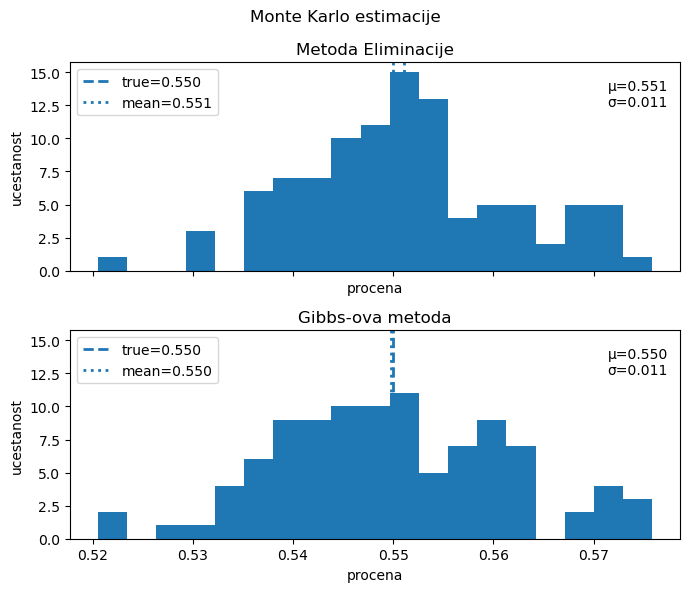

In [68]:
true_val = 0.55
all_vals = np.concatenate([p1, p2])
span = all_vals.max() - all_vals.min()
pad = 0.02 * span
xmin, xmax = all_vals.min() - pad, all_vals.max() + pad
bins = np.linspace(xmin, xmax, 20)

def add_hist(ax, samples, title):
    m = samples.mean()
    s = samples.std()
    ax.hist(samples, bins=bins)
    ax.axvline(true_val, linestyle='--', linewidth=2, label=f'true={true_val:.3f}')
    ax.axvline(m, linestyle=':', linewidth=2, label=f'mean={m:.3f}')
    ax.set_title(title)
    ax.set_xlabel('procena')
    ax.set_ylabel('ucestanost')
    ax.legend()
    ax.text(0.98, 0.92, f'µ={m:.3f}\nσ={s:.3f}',
            ha='right', va='top', transform=ax.transAxes)

fig, axes = plt.subplots(2, 1, figsize=(7, 6), sharex=True, sharey=True)
add_hist(axes[0], p1, 'Metoda Eliminacije')
add_hist(axes[1], p2, 'Gibbs-ova metoda')
fig.suptitle('Monte Karlo estimacije')
plt.tight_layout()
plt.show()


Obe procene daju u proseku tačnu vrednost. Ukupan broj iteracija je veći za metodu eliminacije, međutim broj efektivnih uzoraka je manji.

# Zadatak 2

## 2.1) Simulacija trajektorije i prikaz grafika

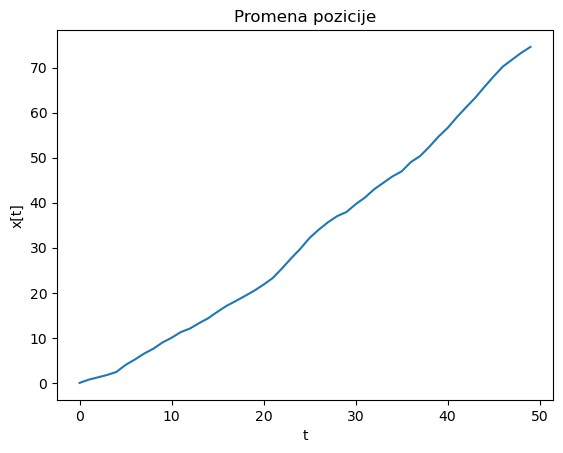

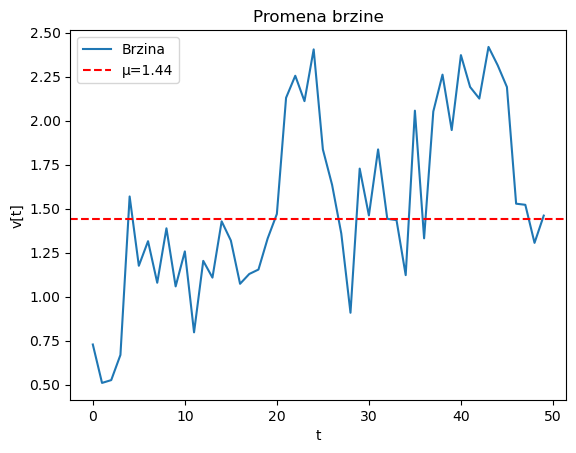

In [5]:
def simulation(T):
    positions = np.zeros(T)
    velocities = np.zeros(T)
    velocities[0] = np.random.randn()
    mu = np.random.uniform(-2, 2)
    
    for t in range(1, T):
        positions[t] = positions[t-1] + velocities[t-1]
        eps = np.random.randn()
        velocities[t] = velocities[t-1] + 0.2*(mu - velocities[t-1]) + 0.32*eps
    
    b = (np.sqrt(np.abs(positions)) + 1e-6) / 5. 
    n = np.random.laplace(0, b, T)
    theta = np.random.binomial(1, 0.05, T)
    measurements = (-1)**theta * positions + n
    
    return (positions, velocities, measurements, mu)

T = 50
x, v, e, mu = simulation(T)

plt.figure()
plt.plot(x)
plt.xlabel("t")
plt.ylabel("x[t]")
plt.title("Promena pozicije")
plt.show()

plt.figure()
plt.plot(v)
plt.axhline(mu, linestyle="--", color="r")
plt.xlabel("t")
plt.ylabel("v[t]")
plt.title("Promena brzine")
plt.legend(['Brzina', f'μ={mu:.2f}'])
plt.show()

## 2.2) Prikaz merenja i prave trajektorije

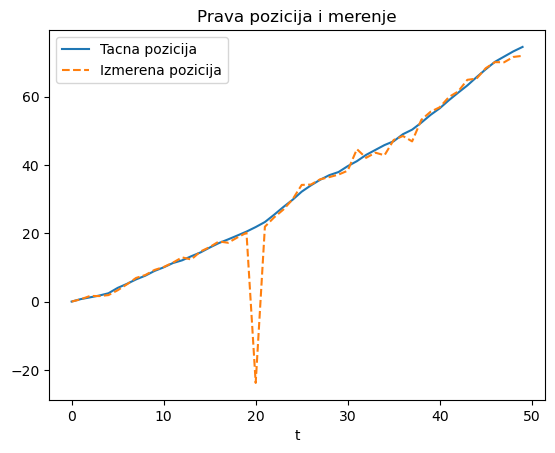

In [6]:
plt.figure()
plt.plot(x)
plt.plot(e, '--')
plt.legend(['Tacna pozicija', 'Izmerena pozicija'])
plt.title("Prava pozicija i merenje")
plt.xlabel('t')
plt.show()

## 2.3) Primena ČF

In [7]:
def particle_filter(e, N=1000, resample_mode="always", mu=None):
    T = len(e)

    particles_hist = np.zeros((T, N))
    weights_hist = np.zeros((T, N))

    est_x = np.zeros(T)
    est_v = np.zeros(T)

    particles_x = np.zeros(N)                
    particles_v = np.random.randn(N)

    if mu is None:
        mu_p = np.random.uniform(-2, 2, size=N)
        unknown = True
    else:
        mu_p = np.ones(N) * mu
        unknown = False

    weights = np.ones(N) / N
    
    est_x[0] = np.sum(weights * particles_x)  
    est_v[0] = np.sum(weights * particles_v)
    particles_hist[0] = particles_x
    weights_hist[0] = weights
        
    for t in range(1, T):
        eps = np.random.randn(N)
        particles_x = particles_x + particles_v
        particles_v = particles_v + 0.2 * (mu_p - particles_v) + 0.32 * eps
         
        b = np.sqrt(np.abs(particles_x) + 1e-6) / 5.
        Lp = np.exp(-np.abs(e[t] - particles_x) / b) / (2 * b)
        Ln = np.exp(-np.abs(e[t] + particles_x) / b) / (2 * b)
        likelihood = 0.95 * Lp + 0.05 * Ln

        weights *= likelihood
        weights += 1e-300
        weights /= np.sum(weights)

        particles_hist[t] = particles_x
        weights_hist[t] = weights

        est_x[t] = np.sum(weights * particles_x)
        est_v[t] = np.sum(weights * particles_v)

        resample = False
        if resample_mode == "always":
            resample = True
        elif resample_mode == "conditional":
            Neff = 1.0 / np.sum(weights**2)
            if Neff < N/2.0:
                resample = True
        elif resample_mode == "none":
            resample = False

        if resample:
            idx = np.random.choice(np.arange(N), size=N, p=weights)
            particles_x = particles_x[idx]
            particles_v = particles_v[idx]
            mu_p = mu_p[idx] 
#             if unknown:
#                 mu_p += np.random.uniform(-0.1, 0.1, N)
#                 mu_p = np.clip(mu_p, -2, 2)
            weights[:]  = 1.0 / N
        

    return est_x, est_v, particles_hist, weights_hist

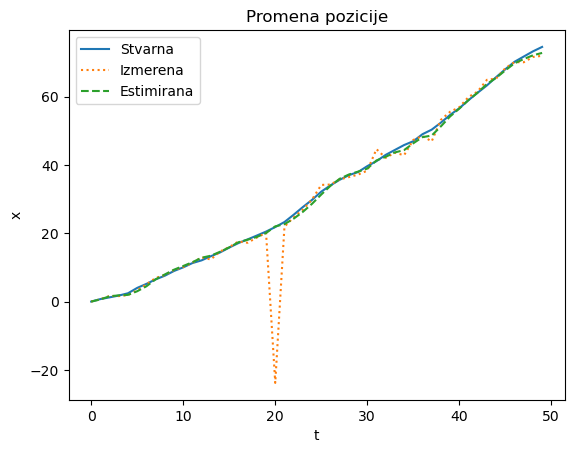

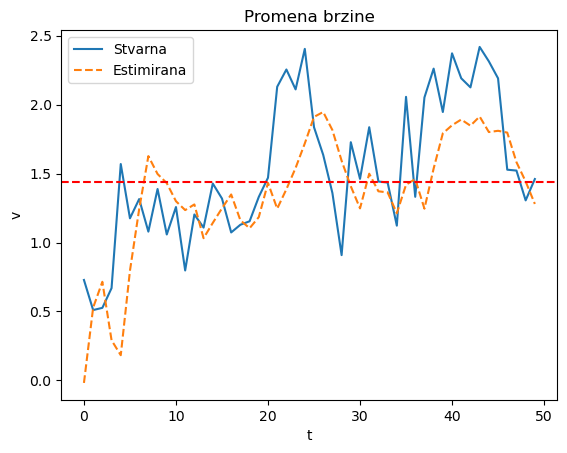

In [8]:
est_x, est_v, particles_hist, weights_hist = particle_filter(e, N=600, resample_mode="always", mu=None)

plt.figure()
plt.plot(x)
plt.plot(e, ':')
plt.plot(est_x, '--')
plt.xlabel("t")
plt.ylabel("x")
plt.title("Promena pozicije")
plt.legend(['Stvarna', 'Izmerena', 'Estimirana'])
plt.show()

plt.figure()
plt.plot(v)
plt.plot(est_v, linestyle="--")
plt.axhline(mu, linestyle="--", color="r")
plt.xlabel("t")
plt.ylabel("v")
plt.title("Promena brzine")
plt.legend(['Stvarna', 'Estimirana'])
plt.show()

## 2.5) Prikaz čestica

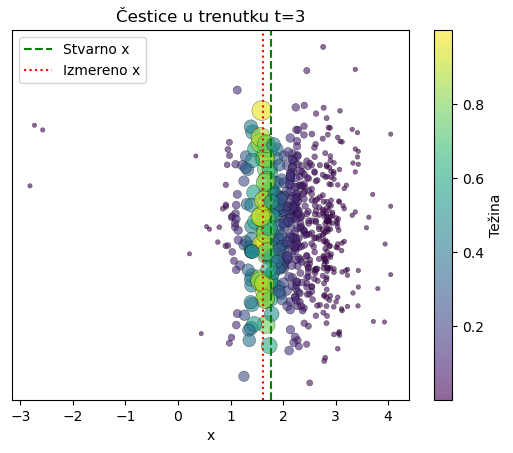

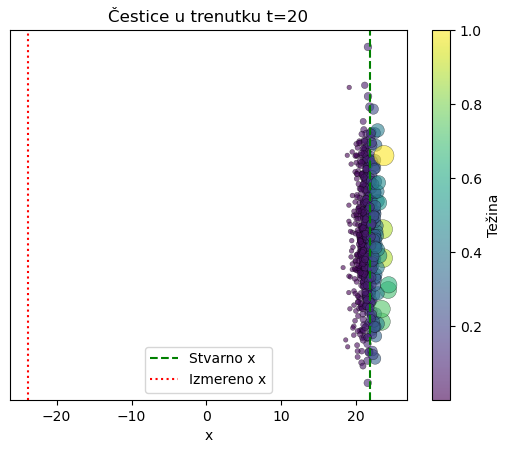

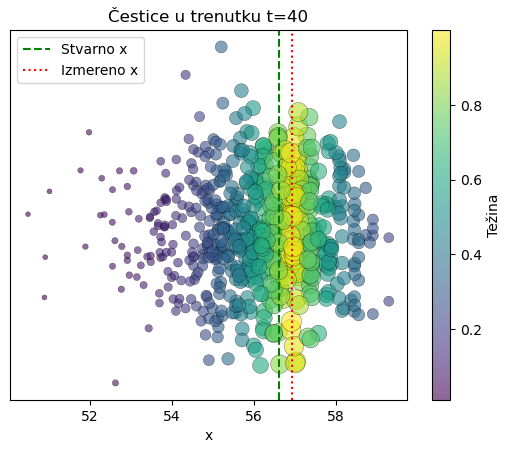

In [10]:
def plot_particles_at_time(t_idx):
    w = weights_hist[t_idx]
    w = w / (w.max() + 1e-12)
    sizes = 10 + 200 * w
    jitter = 0.03 * np.random.randn(len(w))

    plt.figure()
    plt.scatter(particles_hist[t_idx], jitter, s=sizes, alpha=0.6, c=w, cmap="viridis", edgecolors="k", linewidths=0.3)
    plt.axvline(x[t_idx], color="g", linestyle="--", label="Stvarno x")
    plt.axvline(e[t_idx], color="r", linestyle=":", label="Izmereno x")
    plt.title(f"Čestice u trenutku t={t_idx}")
    plt.yticks([])
    plt.xlabel("x")
    plt.legend()
    plt.colorbar(label="Težina")
    plt.show()

for t_sel in [3, 20, 40]:
    plot_particles_at_time(t_sel)

## 2.6) Poređenje raznih načina reuzorkovanja

RMSE (bez reuzorkovanja):                    2.584804273696034
RMSE (reuzorkovanje u svakoj iteraciji):     0.7177744949044788
RMSE (uslovno reuzorkovanje):                0.7492493490437956


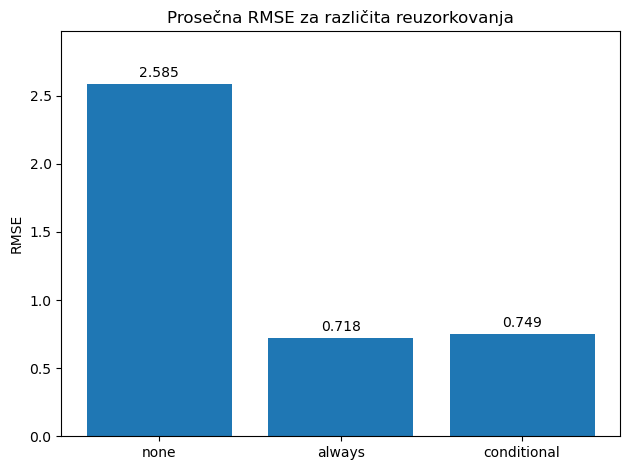

In [17]:
def mc_sim(resample_mode, Nr=100, N=400):
    rmses = []
    for _ in range(Nr):
        x, v, e, mu = simulation(T)
        est_x, _, _, _ = particle_filter(e, N=N, resample_mode=resample_mode, mu=None,)
        rmses.append(np.sqrt(np.mean((est_x - x)**2)))
    return np.mean(rmses)

rmse_none = mc_sim("none", Nr=100, N=1000)
rmse_always = mc_sim("always", Nr=100, N=1000)
rmse_cond  = mc_sim("conditional", Nr=100, N=1000)

print("RMSE (bez reuzorkovanja):                   ", rmse_none)
print("RMSE (reuzorkovanje u svakoj iteraciji):    ", rmse_always)
print("RMSE (uslovno reuzorkovanje):               ", rmse_cond)

labels = ["none","always","conditional"]
vals = [rmse_none, rmse_always, rmse_cond]

fig, ax = plt.subplots()
bars = ax.bar(labels, vals)
ax.set_ylabel("RMSE")
ax.set_title("Prosečna RMSE za različita reuzorkovanja")

ax.bar_label(bars, fmt="%.3f", padding=3)   
ax.set_ylim(0, max(vals)*1.15)              
plt.tight_layout()
plt.show()